In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the train dataset
df=pd.read_csv("train.csv")
dataset=df.copy()
#We will build our preprocessedDataset step by step
preprocessedDataset=pd.DataFrame()
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
#Let's see features
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

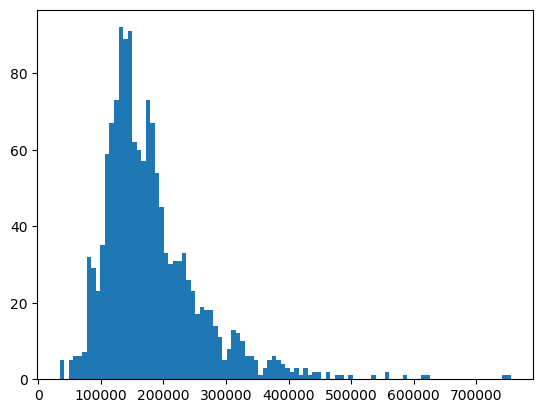

In [4]:
#First, analyze and try to get insight from target for this regression problem
plt.hist(np.array(dataset[["SalePrice"]]),bins=100)
plt.show()
#It seems right-skewed target data
#Statistically Outlier can be found using : IQ=75%-25% => (25%-1.5*IQ,%75+1.5*IQ) outside of these points can accept as outliers
#Later, we should identify cause of the outliers to generate reasonable preprocessed output. Which features effect the outliers? 

In [5]:
targetDataStats=dataset["SalePrice"].describe().astype(float)
print(targetDataStats)

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [6]:
IQ=targetDataStats["75%"]-targetDataStats["25%"]#IQ:Interquartile
rightSideLimit=targetDataStats["75%"]+1.5*IQ
leftSideLimit=targetDataStats["25%"]-1.5*IQ
print("Lower Bound :"+str(leftSideLimit))
print("Upper Bound :"+str(rightSideLimit))
#We can statistically consider the values bigger than upper bound are outliers

Lower Bound :3937.5
Upper Bound :340037.5


[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
Nan Values  0


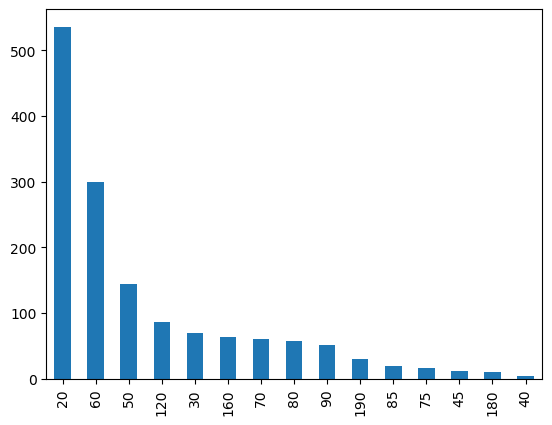

In [7]:
#ID feature is not informative for ML model, so we ignore it,but only used for identifying houses in the last prediction section
#First Feature : MSSubClass : Categorical-Nominal Data, type :int64
"""
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
"""
print(dataset["MSSubClass"].unique())
print(dataset["MSSubClass"].value_counts())
print("Nan Values  " + str(dataset.MSSubClass.isna().sum()))
dataset["MSSubClass"].value_counts().plot(kind='bar')
plt.show()

In [8]:
#We will semantically group categories 
#the categories; [20,30,40,120], [45,50,150], [60,70,75,160],[80,85,90,180,190] 
#=>With respect to the data description, train data does not include example of 150,
#anyway we will include into group due to probability of seeing in test data.

#Get dummies
MSSubClass_columns = pd.get_dummies(dataset["MSSubClass"])
MSSubClassGroup1=MSSubClass_columns[[20,30,40,120]].max(axis=1)
try:
    MSSubClassGroup2=MSSubClass_columns[[45,50,150]].max(axis=1)
except:
    MSSubClassGroup2=MSSubClass_columns[[45,50]].max(axis=1)
MSSubClassGroup3=MSSubClass_columns[[60,70,75,160]].max(axis=1)
MSSubClassGroup4=MSSubClass_columns[[80,85,90,180,190]].max(axis=1)
preprocessedDataset["MSSubClassGroup1"]=MSSubClassGroup1.copy().astype(float)
preprocessedDataset["MSSubClassGroup2"]=MSSubClassGroup2.copy().astype(float)
preprocessedDataset["MSSubClassGroup3"]=MSSubClassGroup3.copy().astype(float)
preprocessedDataset["MSSubClassGroup4"]=MSSubClassGroup4.copy().astype(float)
dataset=dataset.drop(columns=['MSSubClass'])

['RL' 'RM' 'C (all)' 'FV' 'RH']
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


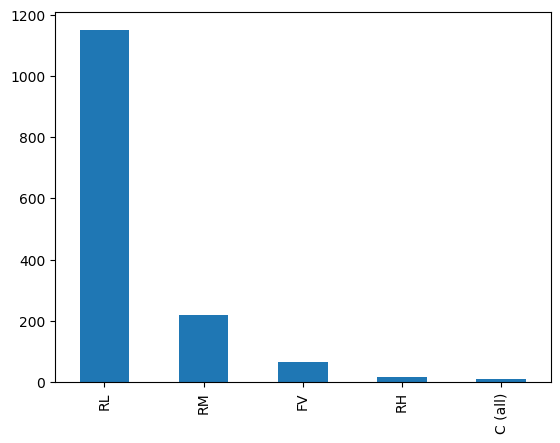

In [9]:
#Next Feature : MSZoning : Identifies the general zoning classification of the sale. Categorical-Nominal Data, type :str
"""
MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
"""
print(dataset["MSZoning"].unique())
print(dataset["MSZoning"].value_counts())
dataset["MSZoning"].value_counts().plot(kind='bar')
plt.show()

In [10]:
MSZoning=dataset.pop('MSZoning')
MSZoning.isna().sum()

0

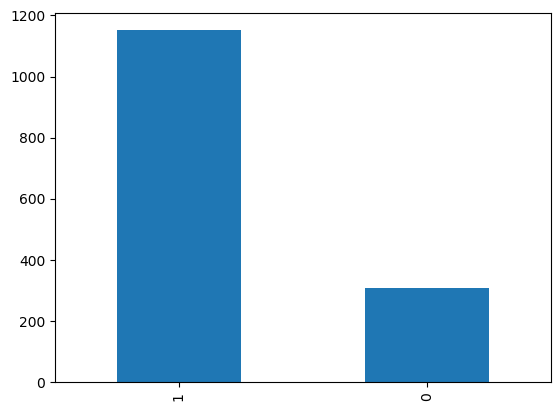

In [11]:
#According to the zoning hist and results, there are 5 cotegories and mostly balanced on RL	Residential Low Density (RL)
#So we will divide it on two binary categories which RL:1 and others:0
MSZoning=MSZoning.map({"RL":1,'RM':0,'C (all)':0, 'FV':0, 'RH':0,'A':0,'I':0,'RP':0})
#Let's see the result
MSZoning.value_counts().plot(kind='bar')
plt.show()

In [12]:
#Add MSZoning on preprocessedDataset
preprocessedDataset["MSZoning"]=MSZoning.copy().astype(float)

['Pave' 'Grvl']
Pave    1454
Grvl       6
Name: Street, dtype: int64


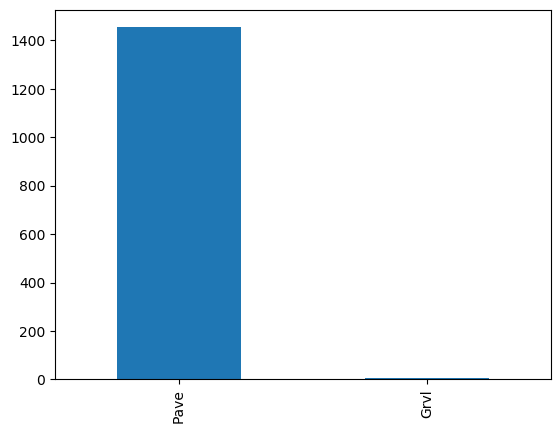

In [13]:
#Next Feature will be another categorical, first we will finish our job with categorical features.
"""Street: Type of road access to property

       Grvl Gravel
       Pave Paved
"""
print(dataset["Street"].unique())
print(dataset["Street"].value_counts())
dataset["Street"].value_counts().plot(kind='bar')
plt.show()
#The Street feature is not informative due to over-imbalanced values, as an instinct, also, I don't believe that it will be useful in multivariate data.
#We will simply drop it

In [14]:
dataset=dataset.drop(columns=["Street"])

[nan 'Grvl' 'Pave']
Grvl    50
Pave    41
Name: Alley, dtype: int64
Nan Values  1369


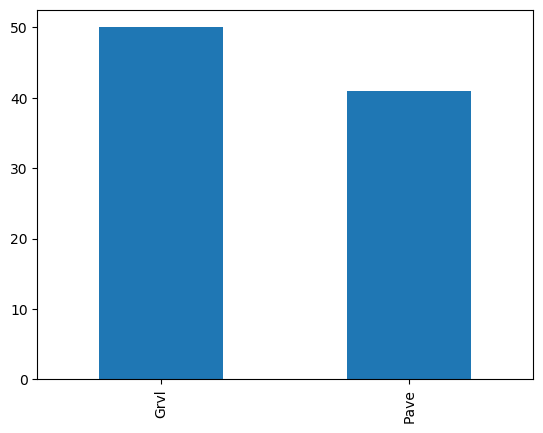

In [15]:
#Next Categorical Feature
"""Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
"""
print(dataset["Alley"].unique())
print(dataset["Alley"].value_counts())
print("Nan Values  " + str(dataset.Alley.isna().sum()))
dataset["Alley"].value_counts().plot(kind='bar')
plt.show()


In [16]:
Grvl=int(dataset["Alley"].value_counts()["Grvl"])
Pave=int(dataset["Alley"].value_counts()["Pave"])
NanVal=dataset.Alley.isna().sum()
percentageOfNoneVal=NanVal/(NanVal+Pave+Grvl)
print("Percentage of None Values : "+str(percentageOfNoneVal))
#Over 90% none values can be dangerous for data, therefore we will simply drop this feature.

Percentage of None Values : 0.9376712328767123


In [17]:
dataset=dataset.drop(columns=["Alley"])

['Reg' 'IR1' 'IR2' 'IR3']
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Nan Values  0


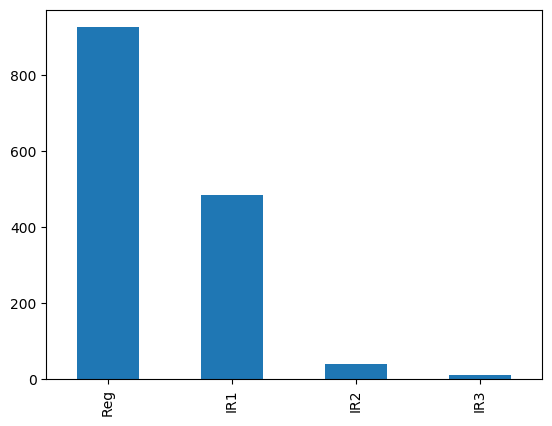

In [18]:
#Next Categorical Feature
"""LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
"""
print(dataset["LotShape"].unique())
print(dataset["LotShape"].value_counts())
print("Nan Values  " + str(dataset.LotShape.isna().sum()))
dataset["LotShape"].value_counts().plot(kind='bar')
plt.show()

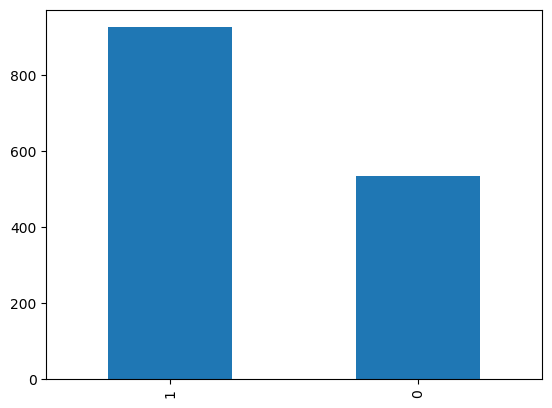

In [19]:
#We will categorize this feature with a binary manner, such as regular :1 and irregular(others):0
LotShape=dataset.pop("LotShape")
LotShape=LotShape.map({"Reg":1,'IR1':0,'IR2':0, 'IR3':0})
#Let's see the result
LotShape.value_counts().plot(kind='bar')
plt.show()

In [20]:
preprocessedDataset["LotShape"]=LotShape.copy().astype(float)

['Lvl' 'Bnk' 'Low' 'HLS']
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Nan Values  0


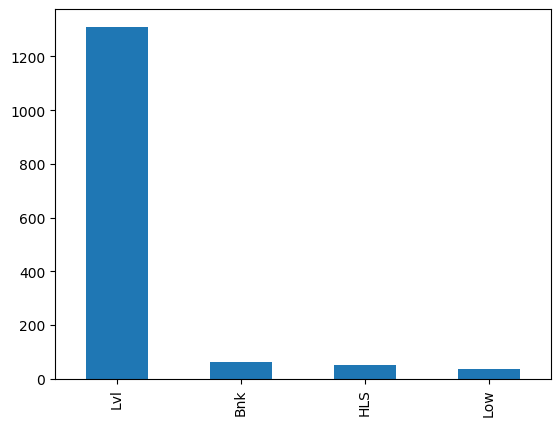

In [21]:
#Next Categorical Feature
"""LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
"""
print(dataset["LandContour"].unique())
print(dataset["LandContour"].value_counts())
print("Nan Values  " + str(dataset.LandContour.isna().sum()))
dataset["LandContour"].value_counts().plot(kind='bar')
plt.show()

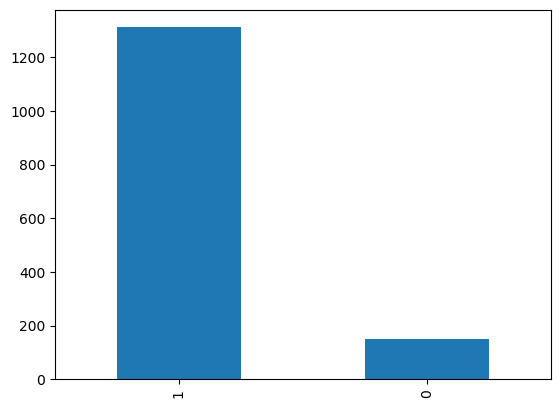

In [22]:
#Feature seems intense with respect to "Lvl" value. It is so early to eliminate this feaure right now, so I will keep it later after checking feature elimination approaches and maybe model improvement
#We will categorize this feature with a binary manner, such as Lvl :1 and others:0
LandContour=dataset.pop("LandContour")
LandContour=LandContour.map({"Lvl":1,'Bnk':0,'HLS':0, 'Low':0})
#Let's see the result
LandContour.value_counts().plot(kind='bar')
plt.show()
preprocessedDataset["LandContour"]=LandContour.copy().astype(float)

['AllPub' 'NoSeWa']
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Nan Values  0


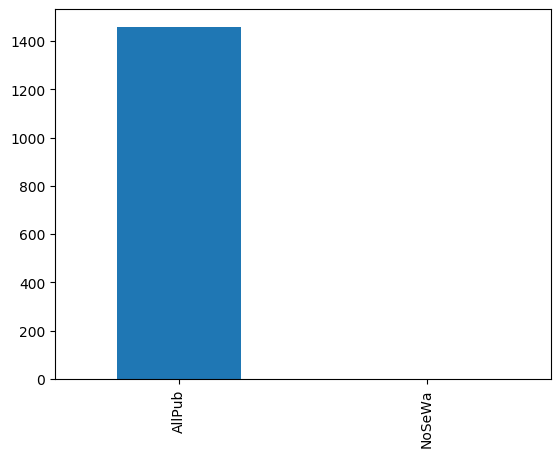

In [23]:
#Next Categorical Feature
"""Utilities: Type of utilities available

       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only
"""
print(dataset["Utilities"].unique())
print(dataset["Utilities"].value_counts())
print("Nan Values  " + str(dataset.Utilities.isna().sum()))
dataset["Utilities"].value_counts().plot(kind='bar')
plt.show()

In [24]:
#We will simply drop it due to non-informatic
dataset=dataset.drop(columns=["Utilities"])

['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Nan Values  0


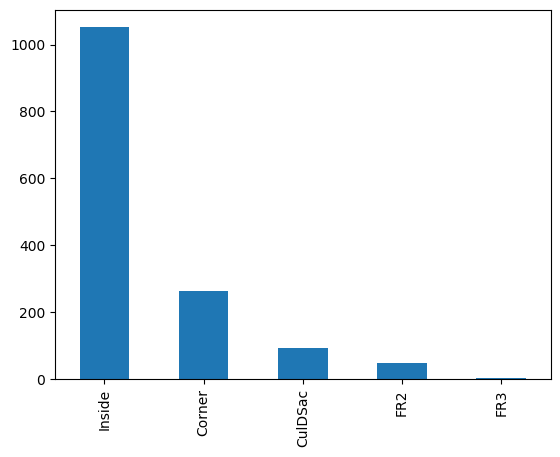

In [25]:
#Next Categorical Feature
"""LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
"""
print(dataset["LotConfig"].unique())
print(dataset["LotConfig"].value_counts())
print("Nan Values  " + str(dataset.LotConfig.isna().sum()))
dataset["LotConfig"].value_counts().plot(kind='bar')
plt.show()

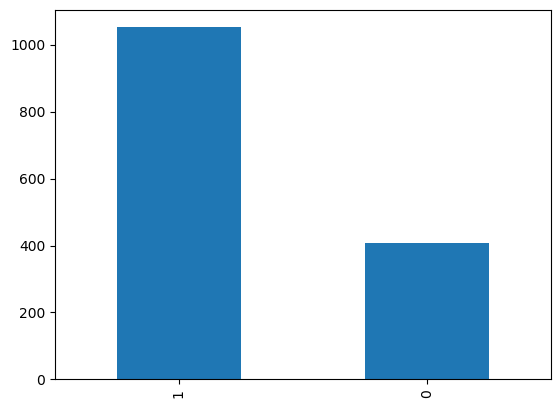

In [26]:
#We will categorize this feature with a binary manner, such as Inside :1 and others:0
LotConfig=dataset.pop("LotConfig")
LotConfig=LotConfig.map({"Inside":1,'Corner':0,'CulDSac':0, 'FR2':0, 'FR3':0})
#Let's see the result
LotConfig.value_counts().plot(kind='bar')
plt.show()
preprocessedDataset["LotConfig"]=LotConfig.copy().astype(float)

['Gtl' 'Mod' 'Sev']
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Nan Values  0


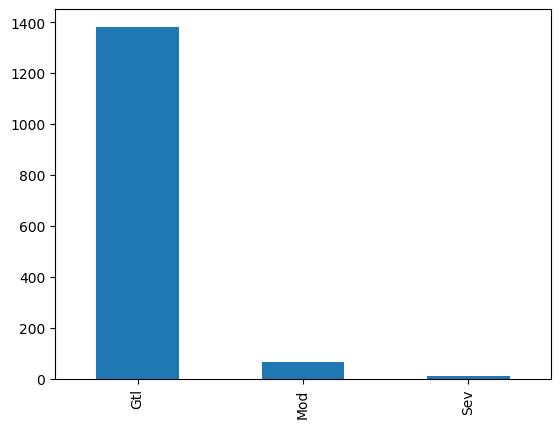

In [27]:
#Next Categorical Feature
"""LandSlope: Slope of property

       Gtl	Gentle slope
       Mod	Moderate Slope
       Sev	Severe Slope
"""
print(dataset["LandSlope"].unique())
print(dataset["LandSlope"].value_counts())
print("Nan Values  " + str(dataset.LandSlope.isna().sum()))
dataset["LandSlope"].value_counts().plot(kind='bar')
plt.show()

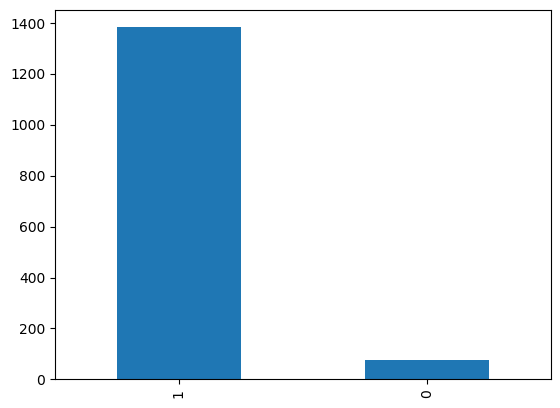

In [28]:
#We will categorize this feature with a binary manner, such as Gtl :1 and others:0
LandSlope=dataset.pop("LandSlope")
LandSlope=LandSlope.map({"Gtl":1,'Mod':0,'Sev':0})
#Let's see the result
LandSlope.value_counts().plot(kind='bar')
plt.show()
preprocessedDataset["LandSlope"]=LandSlope.copy().astype(float)

['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Nan Values  0


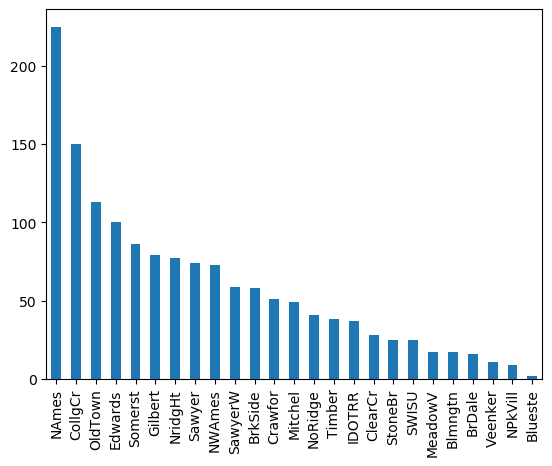

In [29]:
#Next Categorical Feature
"""Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
"""
print(dataset["Neighborhood"].unique())
print(dataset["Neighborhood"].value_counts())
print("Nan Values  " + str(dataset.Neighborhood.isna().sum()))
dataset["Neighborhood"].value_counts().plot(kind='bar')
plt.show()
#This feature is one of the important because location directly effects the price.
#If we group this feature that must be w.r.t. closeness as a distence or zone.
#And if we convert it dummy or one-hot encoding, it will result in so sparisity and high variation.
#Also I don't know the location of these places accordence with neighborhood to each other. 
#So I will keep the analysis of this feature later... for now.

['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
Nan Values  0


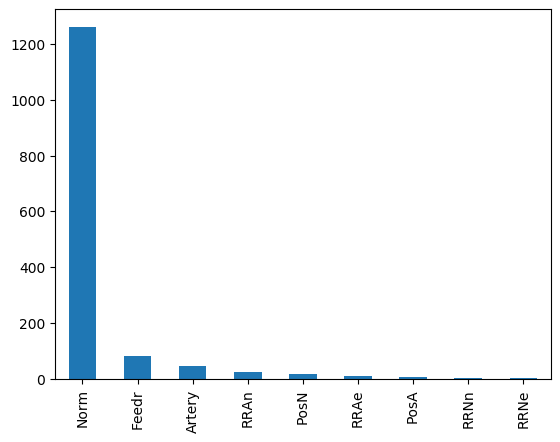

In [30]:
#Next Categorical Feature
"""Condition1: Proximity to various conditions, as well as Condition2 is almost same info so I will keep only Condition1
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
    Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
"""
print(dataset["Condition1"].unique())
print(dataset["Condition1"].value_counts())
print("Nan Values  " + str(dataset.Condition1.isna().sum()))
dataset["Condition1"].value_counts().plot(kind='bar')
plt.show()

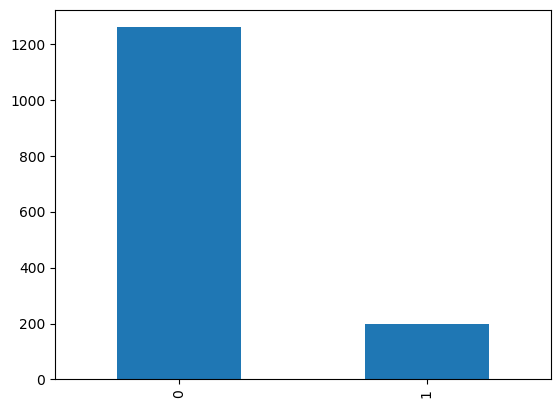

In [31]:
#We will categorize this feature with a binary manner, such as Norm :0 and others:1
Condition1=dataset.pop("Condition1")
dataset=dataset.drop(columns=["Condition2"])
Condition1=Condition1.map({"Norm":0,'Feedr':1, 'PosN':1, 'Artery':1, 'RRAe':1,
                           'RRNn':1, 'RRAn':1, 'PosA':1, 'RRNe':1})
#Let's see the result
Condition1.value_counts().plot(kind='bar')
plt.show()
preprocessedDataset["Conditions"]=Condition1.copy().astype(float)

['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
Nan Values  0


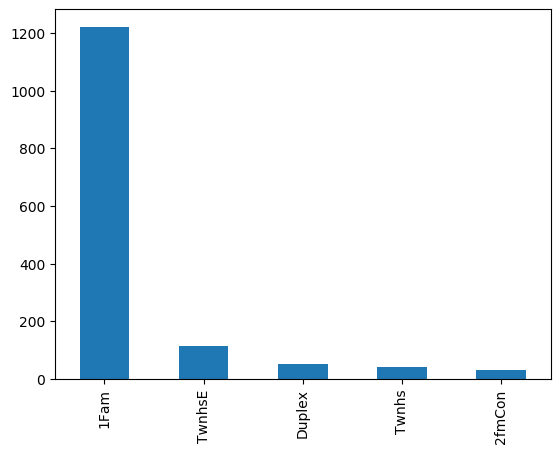

In [32]:
#Next Categorical Feature
"""BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
"""
print(dataset["BldgType"].unique())
print(dataset["BldgType"].value_counts())
print("Nan Values  " + str(dataset.BldgType.isna().sum()))
dataset["BldgType"].value_counts().plot(kind='bar')
plt.show()

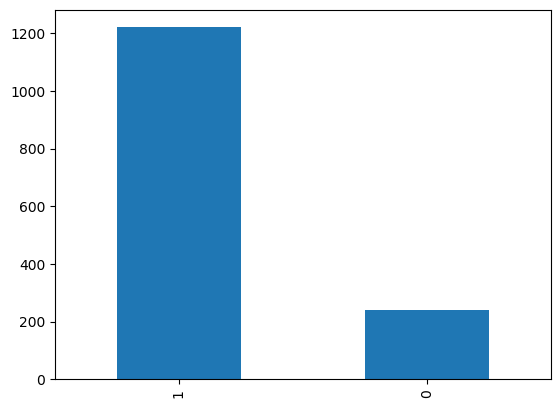

In [33]:
#We will categorize this feature with a binary manner, such as 1Fam :1 and others:0
BldgType=dataset.pop("BldgType")
BldgType=BldgType.map({'1Fam':1, '2fmCon':0, 'Duplex':0, 'TwnhsE':0, 'Twnhs':0})
#Let's see the result
BldgType.value_counts().plot(kind='bar')
plt.show()
preprocessedDataset["BldgType"]=BldgType.copy().astype(float)

['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
Nan Values  0


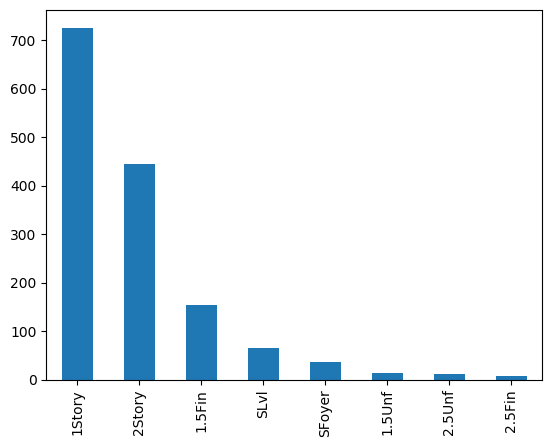

In [34]:
#Next Categorical Feature
"""HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
"""
print(dataset["HouseStyle"].unique())
print(dataset["HouseStyle"].value_counts())
print("Nan Values  " + str(dataset.HouseStyle.isna().sum()))
dataset["HouseStyle"].value_counts().plot(kind='bar')
plt.show()

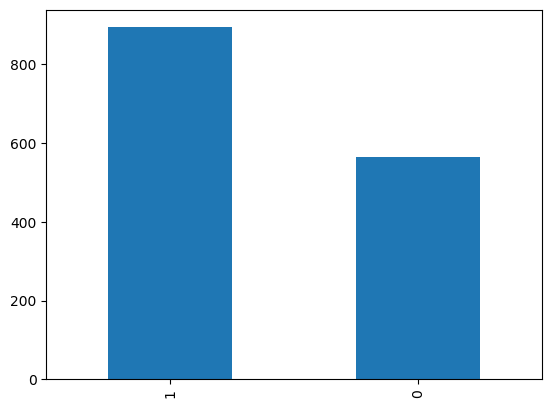

In [39]:
#We will categorize this feature floor based with a binary manner, such as 1based Floors :1 and others:0
HouseStyle=dataset.pop("HouseStyle")
HouseStyle=HouseStyle.map({'1Story':1, '1.5Fin':1, '1.5Unf':1,
                           '2Story':0, '2.5Fin':0, '2.5Unf':0, 'SFoyer':0, 'SLvl':0})
#Let's see the result
HouseStyle.value_counts().plot(kind='bar')
plt.show()
preprocessedDataset["HouseStyle"]=HouseStyle.copy().astype(float)

[ 7  6  8  5  9  4 10  3  1  2]
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
Nan Values  0


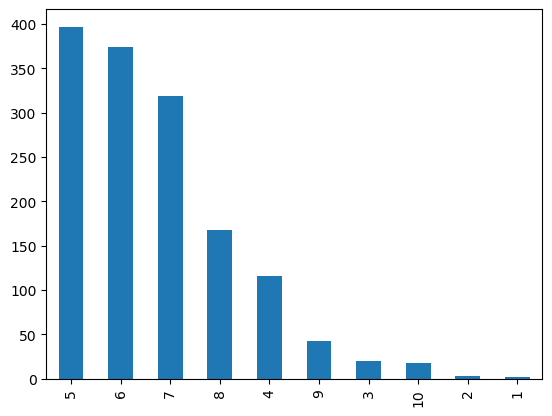

In [40]:
#Next Categorical Feature-Type of Ordinal Categorical
"""OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
"""
print(dataset["OverallQual"].unique())
print(dataset["OverallQual"].value_counts())
print("Nan Values  " + str(dataset.OverallQual.isna().sum()))
dataset["OverallQual"].value_counts().plot(kind='bar')
plt.show()

In [41]:
#We will keep this variable is in Ordinal scale as encoded.
preprocessedDataset["OverallQual"]=dataset.pop("OverallQual")

[5 8 6 7 4 2 3 9 1]
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64
Nan Values  0


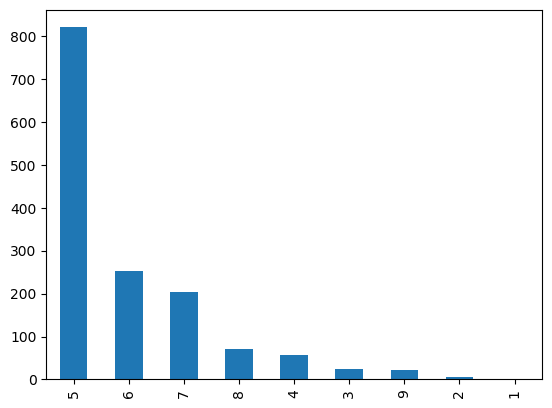

In [42]:
#Next Categorical Feature-Type of Ordinal Categorical
"""OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
"""
print(dataset["OverallCond"].unique())
print(dataset["OverallCond"].value_counts())
print("Nan Values  " + str(dataset.OverallCond.isna().sum()))
dataset["OverallCond"].value_counts().plot(kind='bar')
plt.show()
#We will keep this variable is in Ordinal scale as encoded, too.
preprocessedDataset["OverallCond"]=dataset.pop("OverallCond")

['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
Nan Values  0


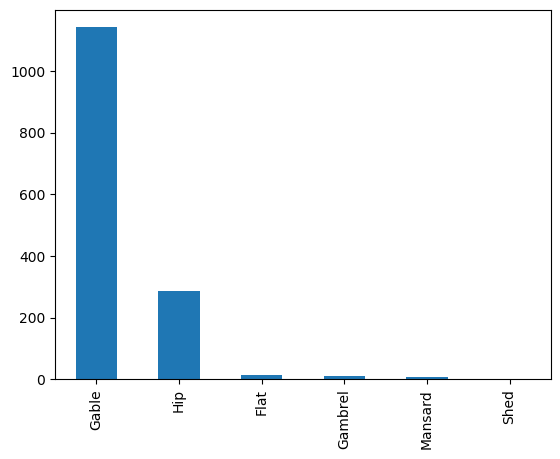

In [43]:
#Next Categorical Feature-Type of Nominal
"""RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
"""
print(dataset["RoofStyle"].unique())
print(dataset["RoofStyle"].value_counts())
print("Nan Values  " + str(dataset.RoofStyle.isna().sum()))
dataset["RoofStyle"].value_counts().plot(kind='bar')
plt.show()

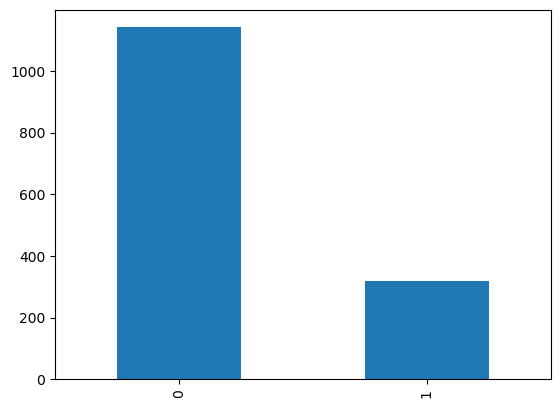

In [44]:
#We will categorize this feature floor based with a binary manner, such as 1based Gable :0 and others:1
RoofStyle=dataset.pop("RoofStyle")
RoofStyle=RoofStyle.map({'Gable':0, 'Hip':1, 'Gambrel':1, 'Mansard':1, 'Flat':1, 'Shed':1})
#Let's see the result
RoofStyle.value_counts().plot(kind='bar')
plt.show()
preprocessedDataset["RoofStyle"]=RoofStyle.copy().astype(float)

['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64
Nan Values  0


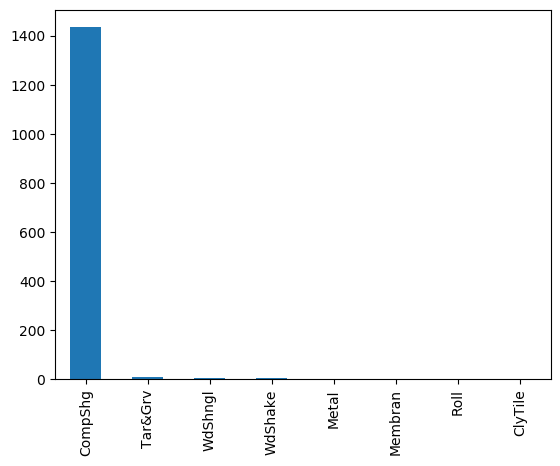

In [45]:
#Next Categorical Feature-Type of Nominal
"""RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
"""
print(dataset["RoofMatl"].unique())
print(dataset["RoofMatl"].value_counts())
print("Nan Values  " + str(dataset.RoofMatl.isna().sum()))
dataset["RoofMatl"].value_counts().plot(kind='bar')
plt.show()

In [46]:
#Simply remove this feature
dataset=dataset.drop(columns=["RoofMatl"])

['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64
Nan Values  0


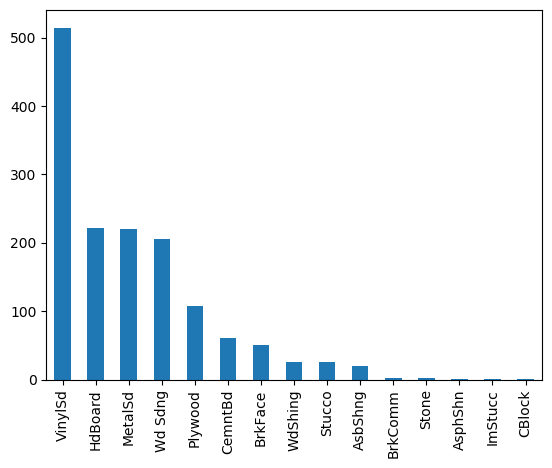

In [47]:
#Next Categorical Feature-Type of Nominal
"""Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
       
       Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
"""
print(dataset["Exterior1st"].unique())
print(dataset["Exterior1st"].value_counts())
print("Nan Values  " + str(dataset.Exterior1st.isna().sum()))
dataset["Exterior1st"].value_counts().plot(kind='bar')
plt.show()

In [48]:
#We will group categories 
#the categories; [VinylSd], [HdBoard], [MetalSd],[Wd Sdng],[Others] 
#For now, we will do it manually, for test set we should refactor the code that can handle
#"out of categories" such as "Other" etc.

#Get dummies
Exterior1st_columns = pd.get_dummies(dataset["Exterior1st"])
Exterior1stGroup1=Exterior1st_columns[["HdBoard"]].max(axis=1)
Exterior1stGroup2=Exterior1st_columns[["MetalSd"]].max(axis=1)
Exterior1stGroup3=Exterior1st_columns[["Wd Sdng"]].max(axis=1)
Exterior1stGroup4=Exterior1st_columns[["VinylSd"]].max(axis=1)
Exterior1stGroup5=Exterior1st_columns[["Plywood","CemntBd","BrkFace","WdShing",
                                       "Stucco","AsbShng","BrkComm","Stone","AsphShn",
                                       "ImStucc","CBlock"]].max(axis=1)
                                      

preprocessedDataset["Exterior1stGroup1"]=Exterior1stGroup1.copy().astype(float)
preprocessedDataset["Exterior1stGroup2"]=Exterior1stGroup2.copy().astype(float)
preprocessedDataset["Exterior1stGroup3"]=Exterior1stGroup3.copy().astype(float)
preprocessedDataset["Exterior1stGroup4"]=Exterior1stGroup4.copy().astype(float)
preprocessedDataset["Exterior1stGroup5"]=Exterior1stGroup5.copy().astype(float)

dataset=dataset.drop(columns=['Exterior1st','Exterior2nd'])

In [49]:
preprocessedDataset

,MSSubClassGroup1,MSSubClassGroup2,MSSubClassGroup3,MSSubClassGroup4,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Conditions,...,LotFrontage,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1stGroup1,Exterior1stGroup2,Exterior1stGroup3,Exterior1stGroup4,Exterior1stGroup5
0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,65.0,0.0,7,5,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,80.0,1.0,6,8,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,68.0,0.0,7,5,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,60.0,0.0,7,5,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,84.0,0.0,8,5,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,62.0,0.0,6,5,0.0,0.0,0.0,0.0,1.0,0.0
1456,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,85.0,1.0,6,6,0.0,0.0,0.0,0.0,0.0,1.0
1457,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,66.0,0.0,7,9,0.0,0.0,0.0,0.0,0.0,1.0
1458,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,68.0,1.0,5,6,1.0,0.0,1.0,0.0,0.0,0.0


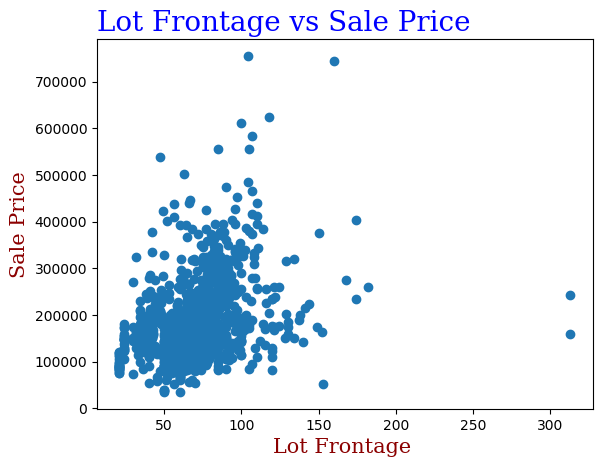

In [35]:
#Next Feature : LotFrontage: Continious-Ratio
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Lot Frontage vs Sale Price", fontdict = font1, loc = 'left')# default loc="middle"
plt.xlabel("Lot Frontage ", fontdict = font2)
plt.ylabel("Sale Price", fontdict = font2)
plt.scatter(dataset['LotFrontage'],dataset["SalePrice"])
plt.show()
#Linearity with some outliers...
preprocessedDataset["LotFrontage"]=dataset['LotFrontage'].copy().astype(float)

In [36]:
#Next Feature: LotArea: Lot size in square feet
LotArea=dataset.LotArea.copy()
LotArea.isna().sum()

0

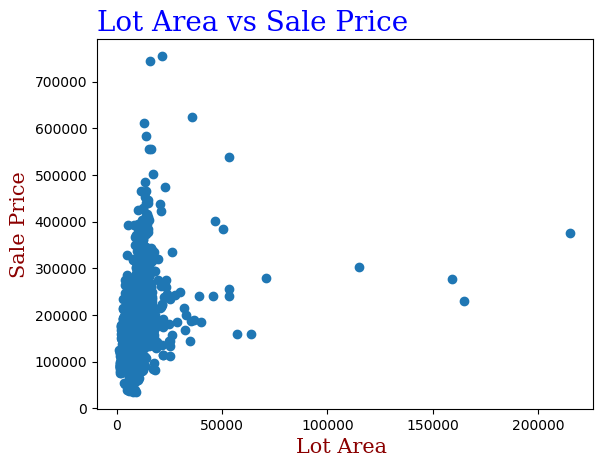

In [37]:
plt.title("Lot Area vs Sale Price", fontdict = font1, loc = 'left')# default loc="middle"
plt.xlabel("Lot Area ", fontdict = font2)
plt.ylabel("Sale Price", fontdict = font2)
plt.scatter(dataset['LotArea'],dataset["SalePrice"])
plt.show()

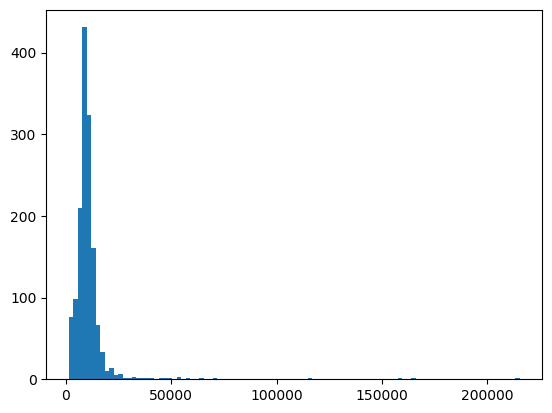

In [38]:
#It looks like there are some misleading data because Lot area 200000 looks enourmous.
#So,we will decide the outliers and change outliers with median of the Lot Size data.
plt.hist(np.array(dataset[['LotArea']]),bins=100)
plt.show()